In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


## 2-step task

#### Background

The 2-step task is one of the most iconic RL tasks (Daw et al. 2011). It was designed to dissect the relative contributions of the MF and MB systems in human choices. There are multiple ways in which MB information can enter choice. For instance, as you will have seen in the case of Dyna, the MF values are additionally trained by the MB system during offline behavioural states. In fact, this process of Dyna-style planning parallels closely hippocampal replay which has been suggested to implement MB planning (Mattar \& Daw, 2018).

For the purpose of this exercise, we will assume that the choice is guided by a linear combination of the MF and MB values. Thus, by tweaking the relative contribution of each, you would expect different behaviours to emerge. Classically, the measure of this balance used in the 2-step task is stay probability. That is, the probability that the subject/agent repeats the same first-stage choice conditioned on the outcome of the second stage in the previous trial.

#### Task 2 [20 marks]

For this part of the assigniment, **your task is to reproduce and visualise data plotted in figure 2** in Daw et al. (2011). There is no pre-implemented code for the agent, except for some basics in the `agent.py` file where you can find the `TwoStepAgent` class. Therefore, you have to follow the methodology in the paper and implement it yourself. You can find the relevant paper in the `papers` folder of this git repository. The only provided code is the one below, as well as the `get_stay_probabilities` method.

In [2]:
from agent import TwoStepAgent

In [5]:
def simulate_agent(w):
    agent = TwoStepAgent(alpha1=0.54, alpha2=0.42, beta1=5.19, beta2=3.69, lam=0.57, w=w, p=0.11)
    np.random.seed(2)
    # run simulations
    num_trials  = 201
    num_averg   = 17
    stay_probas = np.zeros((num_averg, 4))
    for n in range(num_averg):
        agent.simulate(num_trials)
        stay_probas[n, :] = agent.get_stay_probabilities()
    plt.figure(figsize=(4, 3))
    # label with different w
    plt.title('w = {}'.format(w))

    plt.bar(1, np.mean(stay_probas[:, 0]), facecolor='blue', label='common')
    plt.bar(2, np.mean(stay_probas[:, 1]), facecolor='red', label='rare')
    plt.bar(3, np.mean(stay_probas[:, 2]), facecolor='blue')
    plt.bar(4, np.mean(stay_probas[:, 3]), facecolor='red')
    plt.ylim(0.5, 1)
    plt.xticks([1.5, 3.5], ['rewarded', 'unrewarded'])
    plt.yticks([0.5, 0.75, 1])
    plt.legend()

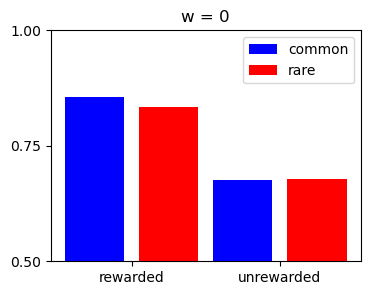

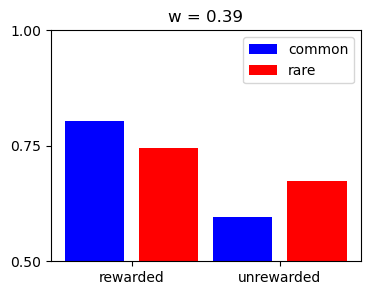

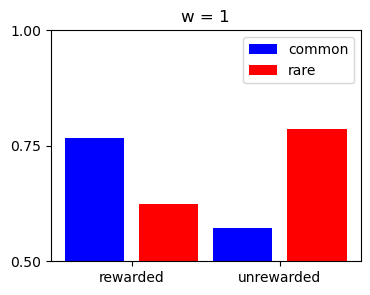

In [6]:
w_list=[0,0.39,1]
for w in w_list:
    simulate_agent(w)
    plt.show()

Describe in your own words the apparent differences between the MF and MB agents. What do the data plotted with best-fitting parameters tell you about the relative contributions of MF and MB systems to subjects' choices?